Loss functions for classification in scikit-learn
Loss functions are implemented in scikit-learn using functions from the sklearn.metrics module. Log loss and cross-entropy loss are implemented using log_loss(). The function takes an array of observed classes, y_true, and predicted probabilities, y_pred. When y_true consists of more than two classes, log_loss() implements cross-entropy loss. The rest of the parameters can be found in the log loss documentation.

Hinge loss is implemented in scikit-learn using hinge_loss(). The function takes an array of observed classes, y_true, and predicted decisions, pred_decision. The values of y_true must consist of two integers where the integer for the positive class is greater than the integer for the negative class. The rest of the parameters can be found in the hinge loss documentation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import LinearSVC

In [2]:
# Load the diabetes dataset
diabetes_full = pd.read_csv('diabetesNHANES.csv')

# Use a smaller random sample of 50 instances
seed = 123
diabetes = diabetes_full.sample(n=50, random_state=seed)
diabetes.head()

,SEQN,diabetes,glucose,insulin,cholesterol,outcome,systolic,diastolic
676,95955,no,5.72,14.08,141,0,56,104
1226,101787,no,4.83,6.89,131,0,67,125
437,101485,no,5.16,15.73,192,0,63,107
1371,99191,no,6.55,12.92,200,0,39,114
1659,101444,pre,6.38,31.09,188,0,76,129


## Logistic regression

In [15]:
# Define input features and output features
X = diabetes[['glucose']]
y = diabetes[['outcome']]

In [17]:
# Initialize a logistic regression model
logisticModel = LogisticRegression(penalty=None)

# Fit the model
logisticModel.fit(X.values, np.ravel(y))


LogisticRegression(penalty=None)

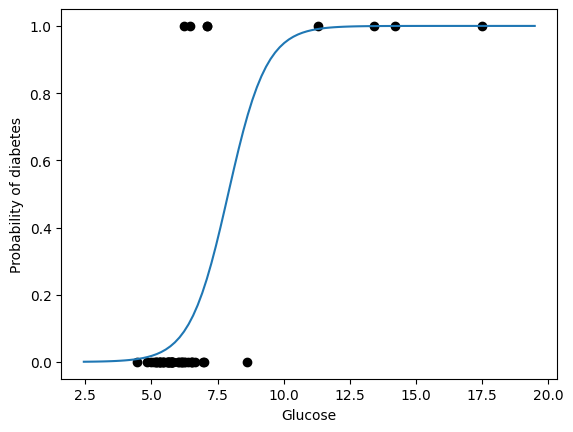

In [5]:
# Plot the data and predicted probabilities
fig = plt.figure()
plt.scatter(X, y, color='black')

x_prob = np.linspace(X.min()-2, X.max()+2, 100)
y_prob = logisticModel.predict_proba(x_prob.reshape(-1, 1))[:, 1]

plt.plot(x_prob, y_prob)
plt.xlabel('Glucose')
plt.ylabel('Probability of diabetes')

plt.show()

In [6]:
# Calculate predicted probabilities
p_hat = logisticModel.predict_proba(X.values)
p_hat[0:6]

array([[0.95315967, 0.04684033],
       [0.98582746, 0.01417254],
       [0.97782635, 0.02217365],
       [0.86608341, 0.13391659],
       [0.89105306, 0.10894694],
       [0.97782635, 0.02217365]])

In [7]:
# Compute the overall log loss
metrics.log_loss(y_true = y, y_pred = p_hat)

0.22687141482074047

In [8]:
# Compute the overall absolute loss
absloss=abs(np.ravel(y)-p_hat[:,1])

sum(absloss)/len(absloss)

0.13205153186249038

## Linear discriminant analysis

In [9]:
# Define input features and output features
X2 = diabetes[['glucose', 'systolic']]
y = diabetes[['outcome']]

# Scale the input features
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

In [10]:
# Initialize a linear discriminant model
LDAmodel = LinearDiscriminantAnalysis(n_components=1)

# Fit the model
LDAmodel.fit(X2, np.ravel(y))

LinearDiscriminantAnalysis(n_components=1)

In [11]:
# Compute the overall hinge loss
metrics.hinge_loss(y,LDAmodel.decision_function(X2))


0.30480188787131707